In [20]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA

from sklearn.metrics import mean_absolute_error

In [2]:
data = pd.read_csv('ac_march_closing.csv')

In [3]:
data.head()

,Date,Close
0,2017-11-14 00:00:00,978.5
1,2017-11-15 00:00:00,985.0
2,2017-11-16 00:00:00,983.0
3,2017-11-17 00:00:00,996.5
4,2017-11-20 00:00:00,998.5


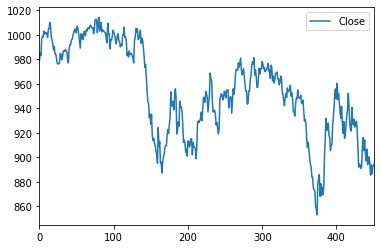

In [4]:
data.plot()
plt.show()

In [5]:
close_Series = pd.Series(list(data.Close), index = data.Date)

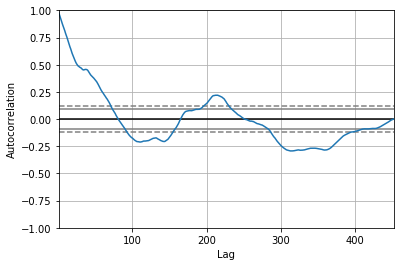

In [6]:
autocorrelation_plot(close_Series)
pyplot.show()

In [7]:
train = close_Series[:85]
test = close_Series[85:]
train

Date
2017-11-14 00:00:00     978.50
2017-11-15 00:00:00     985.00
2017-11-16 00:00:00     983.00
2017-11-17 00:00:00     996.50
2017-11-20 00:00:00     998.50
                        ...   
2018-03-13 00:00:00    1014.25
2018-03-14 00:00:00    1003.00
2018-03-15 00:00:00    1004.75
2018-03-16 00:00:00    1010.00
2018-03-19 00:00:00    1002.25
Length: 85, dtype: float64

In [8]:
train = close_Series[:340]
test = close_Series[80:]

model = ARIMA(train, order=(5,1,5))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\pmven\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\pmven\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  339
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -1120.862
Method:                       css-mle   S.D. of innovations              6.560
Date:                Fri, 08 Nov 2019   AIC                           2265.724
Time:                        19:01:13   BIC                           2311.636
Sample:                             1   HQIC                          2284.020
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1294      0.106     -1.216      0.225      -0.338       0.079
ar.L1.D.y     -2.2620      0.097    -23.353      0.000      -2.452      -2.072
ar.L2.D.y     -1.2852      0.132     -9.706      0.0

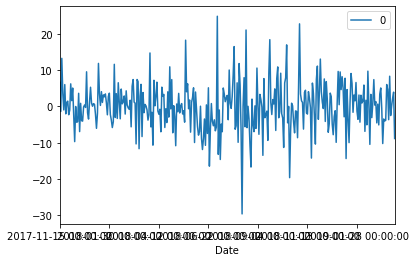

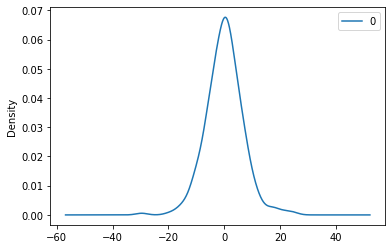

                0
count  339.000000
mean     0.011876
std      6.606072
min    -29.586796
25%     -3.805030
50%      0.177460
75%      3.639760
max     24.811251


In [9]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

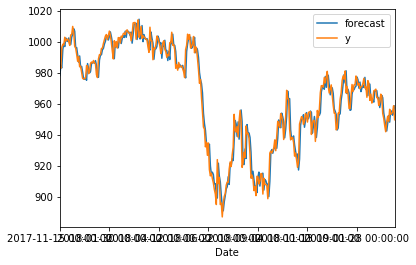

In [10]:
model_fit.plot_predict(dynamic=False)
plt.show()

C:\Users\pmven\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\pmven\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


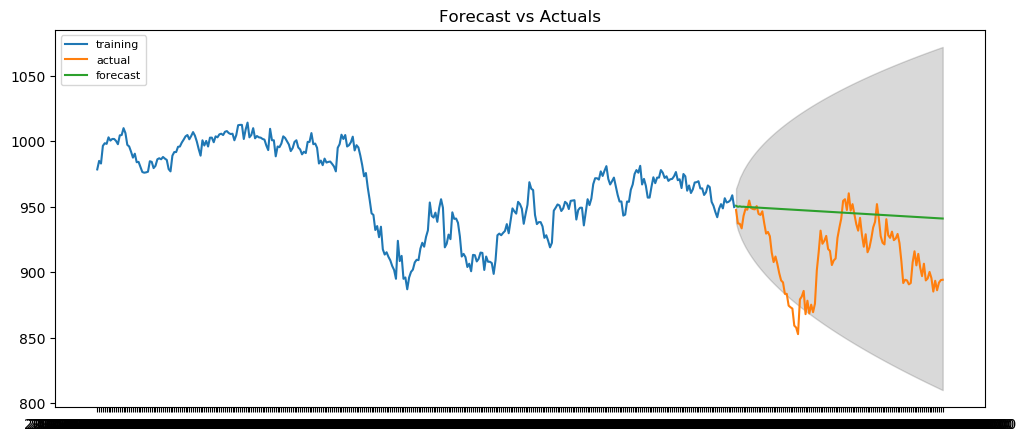

In [11]:
train = close_Series[:340]
test = close_Series[341:]

model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

fc, se, conf = fitted.forecast(111, alpha=0.05)  # 95% conf

fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [54]:
test.shape

(372,)

In [13]:
len(fc)

111

In [14]:
len(test)

111

In [21]:
mean_absolute_error(test, fc)

31.639566150739185